# Data Cleaning and Intital Data Analysis of Pew Research Center's Teen Dating Survey

* This notebook cleans a portion of the raw data from Pew Research Center's 2014 - 2015 Teen Dating Survey. It also includes some initial exploratory data analysis. 

* Link to data: https://www.pewresearch.org/internet/dataset/september-2014-march-2015-teens/
    From 9/25/14 to 10/9/14 and from 2/10/15 to 3/6/15 Pew Research Center collected data from more than 1600 parents and children asking them a wide variety of questions revolving around technology, social media, dating, and friendships. Pew also collected demographic information from the respondents. 

In [1]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
raw_df = pd.read_csv('../data/Teen_Dating_Survey.csv')

# Dataframe Examination 

In [3]:
raw_df.shape

(1642, 318)

In [4]:
raw_df.sample(15)

,CaseID,par_weight,teen_weight,xspanish,xprimelan,QS1,QS2,P1_A,P1_B,P1_C,...,ppreg9,PPRENT,PPSTATEN,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PPWORK,PPNET
805,1004,,,1,5,0,,,,,...,9.0,1.0,93.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
388,497,0.6727,0.368,1,5,1,1,1,2,2,...,2.0,2.0,23.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
1098,1400,,,2,3,,,,,,...,7.0,2.0,74.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0
1131,1446,1.1231,0.7962,1,5,1,1,1,2,2,...,5.0,1.0,54.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0
272,339,0.7449,1.4308,1,5,1,1,1,2,1,...,8.0,1.0,82.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0
1536,2022,0.9325,0.1135,1,5,1,1,1,2,1,...,7.0,1.0,71.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
1110,1417,1.3295,0.917,1,1,1,1,1,2,1,...,9.0,2.0,93.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
1275,1633,,,2,3,2,2,,,,...,8.0,1.0,86.0,0.0,1.0,3.0,2.0,2.0,4.0,1.0
504,656,1.1855,0.8739,1,5,1,1,1,2,1,...,2.0,1.0,22.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
1151,1470,2.2047,4.657,1,5,2,2,1,1,1,...,5.0,1.0,54.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0


### There are 1642 rows and 318 columns in this dataframe.

### Each row represents an individual, either a parent or teenager, and their responses to the survey questions.  

### The first column is an identification number but I'm not sure what columns 2 - 7 represent. I have access to the survey questions but could not connect these columns to any information in that document. The rest of the columns represent questions asked in the survey. 

# Data Cleaning
### Since this data file is very large Mason, Sofi, and I will be splitting it into 3 sections and cleaning these sections individually. We will only include survey questions that are relevant to our final project in our cleaned dataframes. My section covers demographic data and a few survey questions. 

### I realized while cleaning the data that I can't actually use some of the demographic data columns. All of the responses to the survey are coded as numbers and it is unclear which reponse the numbers represent. The survey question document does provide summary statistics for each of the questions but for some of the questions the numbers on the document do not align with the numbers on the file. 

In [5]:
# The ppreg9 column represents a question that asked parents what region they lived in with 9 possible answers. None of the data 
# in the survey question document correspond with the value counts below. This didn't occur with all of the columns.
raw_df['ppreg9'].value_counts()

9.0    303
5.0    265
3.0    255
7.0    207
2.0    183
8.0    135
4.0    122
1.0     84
6.0     81
Name: ppreg9, dtype: int64

### Clean dataframe

In [6]:
# My cleaned data frame includes the questions related to dating/relationships in my section and some demographic data.
clean_df = raw_df[['CaseID','KR10_1','KR10_2','KR10_3','KR10_4','KR10_5','KR10_6','KR11_A','KR11_B','KR11_C','KR11_D','KR11_E',
                   'KR11_F','KR11_G','KR11_H','KR11_I','KR11_J','KR11_K','KR12_1','KR12_2','KR12_3','KRS','KSO','KTG',
                   'Child_age','Child_gender','PPMSACAT','PPRENT','PPHHSIZE','PPNET']]

newcolname_map = {
    'CaseID': 'ID',
    'KR10_1': 'accbu_text',
    'KR10_2': 'accbu_inperson',
    'KR10_3': 'accbu_phone',
    'KR10_4': 'accbu_sm',
    'KR10_5': 'accbu_friend',
    'KR10_6': 'accbu_smstatus',
    'KR11_A':'bu_phone',
    'KR11_B':'bu_inperson',
    'KR11_C':'bu_text',
    'KR11_D': 'bu_sm',
    'KR11_E': 'bu_email',
    'KR11_F': 'bu_fbstatus',
    'KR11_G':'bu_smstatus',
    'KR11_H': 'bu_image',
    'KR11_I': 'bu_drift',
    'KR11_J':'bu_other',
    'KR11_K': 'bu_never',
    'KR12_1': 'dump_phone',
    'KR12_2': 'dump_inperson',
    'KR12_3':'dump_text',
    'KRS': 'Sex',
    'KSO': 'Sexuality',
    'KTG': 'Transgender',
    'Child_age': 'Child_Age',
    'Child_gender': 'Child_Gen',
    'PPMSACAT': 'Parent_Metro',
    'PPRENT': 'Parent_Rent',
    'PPHHSIZE': 'Household_Size',
    'PPNET': 'Parent_Internet',
}

clean_df = clean_df.rename(columns=newcolname_map)

### I don't know why but some of the responses to the question "Do you consider yourself to be____", which is in regards to an individual's sexuality, are recorded as -1. I'm going to ignore these responses in my later analyses. The number of people who are coded as -1 are very low compared to all of the responses we have. This occurs with other columns too.

In [7]:
 clean_df["Sexuality"].value_counts()

2     970
      578
5      30
3      27
-1     14
4      12
1       4
Name: Sexuality, dtype: int64

### Additional columns with long descriptions of row data

In [8]:
# The data in these new demographic columns will contain the actual responses that the numbers align with. 

sexuality_mapping = {
    '1': 'Gay or Lesbian',
    '2': 'Straight',
    '3': 'Bisexual',
    '4': 'Something else',
    '5': 'Not sure'
    
}
clean_df['Sexuality2'] = clean_df['Sexuality'].map(sexuality_mapping)


cgender_mapping = {
    '1': 'Male',
    '2': 'Female'

}
clean_df['Child_Gen2'] = clean_df['Child_Gen'].map(cgender_mapping)


trans_map = {
    '1': 'Yes',
    '2': 'Yes',
    '3': 'Yes',
    '4': 'No'
    
}
clean_df['Transgender2'] = clean_df['Transgender'].map(trans_map)


Pmetro_map = {
    1.0: 'Metro',
    0.0: 'Non-metro'
}
clean_df['Parent_Metro2'] = clean_df['Parent_Metro'].map(Pmetro_map)


Prent_map = {
    1.0: 'Own',
    2.0: 'Rent',
    3.0: 'Neither'
}
clean_df['Parent_Rent2'] = clean_df['Parent_Rent'].map(Prent_map)


pnet_map = {
    1.0: 'Yes',
    0.0: 'No'
}
clean_df['Parent_Internet2'] = clean_df['Parent_Internet'].map(pnet_map)

In [9]:
# The data in these new survey response columns will contain the actual responses that the numbers align with. 
bu_phone_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_phone2'] = clean_df['bu_phone'].map(bu_phone_map)


bu_inperson_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_inperson2'] = clean_df['bu_inperson'].map(bu_inperson_map)


bu_text_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_text2'] = clean_df['bu_text'].map(bu_text_map)


bu_sm_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_sm2'] = clean_df['bu_sm'].map(bu_sm_map)


bu_email_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_email2'] = clean_df['bu_email'].map(bu_email_map)


bu_fbstatus_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_fbstatus2'] = clean_df['bu_fbstatus'].map(bu_fbstatus_map)


bu_smstatus_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_smstatus2'] = clean_df['bu_smstatus'].map(bu_smstatus_map)


bu_image_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_image2'] = clean_df['bu_image'].map(bu_image_map)


bu_drift_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_drift2'] = clean_df['bu_drift'].map(bu_drift_map)


bu_other_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_other2'] = clean_df['bu_other'].map(bu_other_map)


bu_never_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['bu_never2'] = clean_df['bu_never'].map(bu_image_map)


dump_phone_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['dump_phone2'] = clean_df['dump_phone'].map(dump_phone_map)


dump_inperson_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['dump_inperson2'] = clean_df['dump_inperson'].map(dump_inperson_map)


dump_text_map = {
    '0': 'No',
    '1': 'Yes'
}
clean_df['dump_text2'] = clean_df['dump_text'].map(dump_text_map)



### Change data types

In [10]:
# Some of the data needs to be converted into integers to make it easier to plot 
clean_df['Child_Age'] = pd.to_numeric(clean_df['Child_Age'],errors='coerce')
clean_df['accbu_text'] = pd.to_numeric(clean_df['accbu_text'],errors='coerce')
clean_df['accbu_inperson'] = pd.to_numeric(clean_df['accbu_inperson'],errors='coerce')
clean_df['accbu_sm'] = pd.to_numeric(clean_df['accbu_sm'],errors='coerce')
clean_df['accbu_friend'] = pd.to_numeric(clean_df['accbu_friend'],errors='coerce')
clean_df['accbu_smstatus'] = pd.to_numeric(clean_df['accbu_smstatus'],errors='coerce')
clean_df['accbu_phone'] = pd.to_numeric(clean_df['accbu_phone'],errors='coerce')

#### There are some rows with weird data entries (negative numbers, words) in certain columns. I plan on keeping these rows in the cleaned dataframe but will ignore them as neccessary when conducting my data analysis.

### Here is my clean dataframe

In [11]:
clean_df.sample(10)

,ID,accbu_text,accbu_inperson,accbu_phone,accbu_sm,accbu_friend,accbu_smstatus,bu_phone,bu_inperson,bu_text,...,bu_email2,bu_fbstatus2,bu_smstatus2,bu_image2,bu_drift2,bu_other2,bu_never2,dump_phone2,dump_inperson2,dump_text2
302,379,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,31,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,908,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,954,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,380,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,635,6.0,10.0,9.0,2.0,6.0,1.0,0,0,0,...,No,No,No,No,No,No,Yes,No,No,No
1318,1697,9.0,10.0,7.0,3.0,3.0,7.0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,133,3.0,1.0,2.0,6.0,5.0,4.0,1,0,0,...,No,No,No,No,No,No,No,Yes,No,No
1282,1648,5.0,10.0,9.0,1.0,5.0,1.0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1152,1471,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Here is a cleaned dataframe containing only detailed demographic information

In [12]:
cleandem_df = clean_df[['ID','Sex','Sexuality2', 'Transgender2', 'Parent_Metro2', 'Parent_Rent2','Parent_Internet2',
                        'Child_Gen2','Child_Age','Household_Size']]
cleandem_df.sample(10)

,ID,Sex,Sexuality2,Transgender2,Parent_Metro2,Parent_Rent2,Parent_Internet2,Child_Gen2,Child_Age,Household_Size
894,1122,,Straight,No,Metro,Own,Yes,Male,14.0,4.0
1375,1790,,NaN,NaN,Metro,Own,Yes,NaN,NaN,5.0
376,480,,Straight,No,Metro,Rent,Yes,Female,15.0,5.0
73,101,1,NaN,Yes,Metro,Own,Yes,Female,16.0,3.0
1592,2098,1,Bisexual,No,Metro,Own,Yes,Female,16.0,4.0
949,1206,,Straight,No,Metro,Own,Yes,Female,13.0,9.0
69,92,2,Straight,No,Non-metro,Own,Yes,Male,13.0,4.0
1572,2074,2,Straight,No,Metro,Rent,Yes,Male,14.0,6.0
594,759,,NaN,NaN,Metro,Own,Yes,NaN,NaN,2.0
428,553,,NaN,NaN,Metro,Own,Yes,NaN,NaN,4.0


### Here is a cleaned dataframe containing only the columns with the detailed answers to the survey questions and detailed demographic information

In [13]:
cleansurvey_df = clean_df[['ID','accbu_text', 'accbu_inperson', 'accbu_phone','accbu_sm','accbu_friend','accbu_smstatus',
                           'bu_phone2','bu_inperson2','bu_text2','bu_sm2', 'bu_email2','bu_fbstatus2','bu_smstatus2','bu_image2',
                           'bu_drift2','bu_other2','bu_never2','dump_phone2','dump_inperson2','dump_text2','Sex','Sexuality2', 
                           'Transgender2', 'Parent_Metro2', 'Parent_Rent2','Parent_Internet2','Child_Gen2','Child_Age',
                           'Household_Size']]
cleansurvey_df.sample(10)

,ID,accbu_text,accbu_inperson,accbu_phone,accbu_sm,accbu_friend,accbu_smstatus,bu_phone2,bu_inperson2,bu_text2,...,dump_text2,Sex,Sexuality2,Transgender2,Parent_Metro2,Parent_Rent2,Parent_Internet2,Child_Gen2,Child_Age,Household_Size
422,545,5.0,10.0,7.0,1.0,3.0,1.0,NaN,NaN,NaN,...,NaN,,Straight,No,Metro,Own,Yes,Female,13.0,5.0
629,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,Metro,Own,Yes,NaN,NaN,5.0
672,852,1.0,10.0,7.0,1.0,5.0,1.0,NaN,NaN,NaN,...,NaN,,Straight,No,Metro,Own,Yes,Male,14.0,5.0
698,881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,Metro,Rent,Yes,NaN,NaN,3.0
1341,1737,2.0,10.0,2.0,1.0,1.0,4.0,NaN,NaN,NaN,...,NaN,,Straight,No,Metro,Own,Yes,Male,17.0,6.0
789,987,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,,Straight,No,Non-metro,Own,Yes,Male,14.0,3.0
597,762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,Non-metro,Own,Yes,NaN,NaN,4.0
468,610,7.0,10.0,8.0,1.0,1.0,1.0,Yes,Yes,Yes,...,No,1,Straight,No,Metro,Own,Yes,Male,16.0,3.0
888,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,Metro,Own,Yes,NaN,NaN,6.0
847,1055,1.0,5.0,1.0,1.0,1.0,1.0,No,No,No,...,No,2,Straight,No,Metro,Own,Yes,Female,14.0,4.0


# Data Exploration

### There is a roughly even distribution of female and male children. Ages are also roughly evenly distributed. 

In [14]:
# I created a row filter in order to exclude any N/A responses
nagen_rf = cleansurvey_df['Child_Gen2'].isna()

# Table of data
cleansurvey_df[-nagen_rf]['Child_Gen2'].value_counts().sort_index()

Female    545
Male      536
Name: Child_Gen2, dtype: int64

In [15]:
# Create N/A row filter
naage_rf = cleansurvey_df['Child_Age'].isna()

# Table of data
cleansurvey_df[-naage_rf]['Child_Age'].value_counts().sort_index()

13.0    237
14.0    210
15.0    201
16.0    218
17.0    215
Name: Child_Age, dtype: int64

In [16]:
cleansurvey_df.columns

Index(['ID', 'accbu_text', 'accbu_inperson', 'accbu_phone', 'accbu_sm',
       'accbu_friend', 'accbu_smstatus', 'bu_phone2', 'bu_inperson2',
       'bu_text2', 'bu_sm2', 'bu_email2', 'bu_fbstatus2', 'bu_smstatus2',
       'bu_image2', 'bu_drift2', 'bu_other2', 'bu_never2', 'dump_phone2',
       'dump_inperson2', 'dump_text2', 'Sex', 'Sexuality2', 'Transgender2',
       'Parent_Metro2', 'Parent_Rent2', 'Parent_Internet2', 'Child_Gen2',
       'Child_Age', 'Household_Size'],
      dtype='object')

### One survey questions asks,  "Have you ever broken up with another person in person?" and the potential responses are "Yes" and "No" . Here is the distribution of responses. 

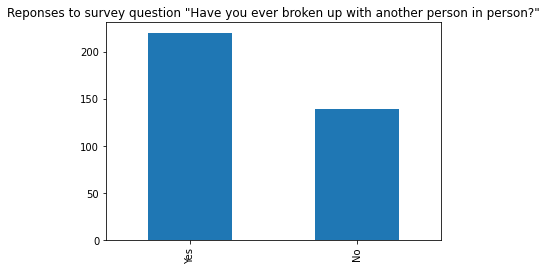

In [17]:
# Plot data
cleansurvey_df['bu_inperson2'].value_counts().plot(kind='bar')
plt.title('Reponses to survey question "Have you ever broken up with another person in person?"');

#### Futher analysis could look at the above question but among different demographic categories. For example, gender. 

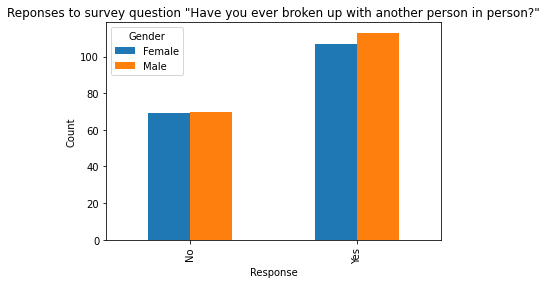

In [18]:
child_gen_grouping = cleansurvey_df.groupby('Child_Gen2')
bu_inperson2_by_gender = child_gen_grouping['bu_inperson2'].value_counts().unstack(level=0).round(2)
bu_inperson2_by_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Reponses to survey question "Have you ever broken up with another person in person?"')
plt.legend(title = 'Gender');

#### The distribution in responses seem pretty even by gender. By looking at proportions we can further confirm this. 

In [19]:
child_gen_grouping['bu_inperson2'].value_counts(normalize=True).unstack(level=0).round(2)

Child_Gen2,Female,Male
bu_inperson2,,
No,0.39,0.38
Yes,0.61,0.62


### I added all of my clean data frames to the data folder. 

In [20]:
# Clean dataframe with all cleaned columns
clean_df.to_csv('../data/Joy_Clean_Teen_Dating.csv', index=False)

# Clean dataframe with only demograhic information
cleandem_df.to_csv('../data/Joy_Clean_Teen_Dating_dem.csv', index=False)

#Clean dataframe with long descriptions of survey responses and demographic information
cleansurvey_df.to_csv('../data/Joy_Clean_Teen_Dating_Short.csv', index=False)
